# Homework 1

# Problem 1

In [5]:
import matplotlib.pyplot as plt
import numpy as np

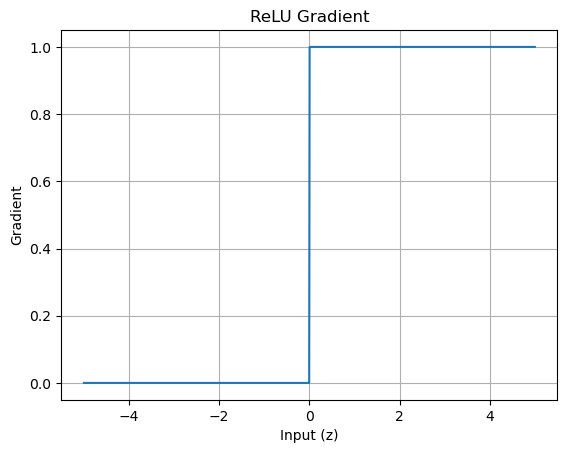

In [9]:
def relu_gradient(z):
  return np.where(z >= 0, 1, 0)
z = np.linspace(-5, 5, 1000)
gradient = relu_gradient(z)
plt.plot(z, gradient)
plt.xlabel("Input (z)")
plt.ylabel("Gradient")
plt.title("ReLU Gradient")
plt.grid(True)
plt.show()

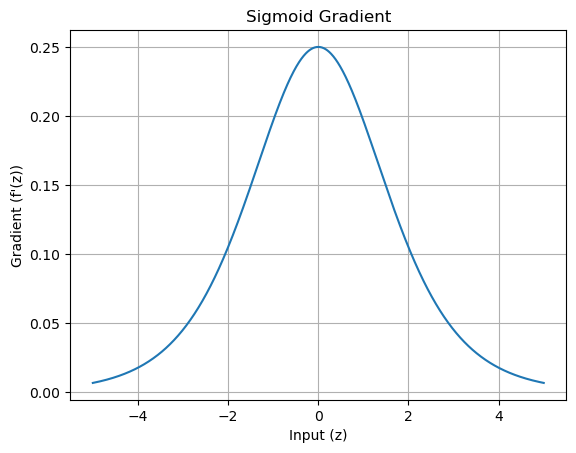

In [10]:
def sigmoid_activation(z):
    return 1 / (1 + np.exp(-z))
def sigmoid_gradient(z):
    return sigmoid_activation(z) * (1 - sigmoid_activation(z))
x = np.linspace(-5, 5, 1000)
sigmoid_gradients = sigmoid_gradient(x)
plt.plot(x, sigmoid_gradients, label='Sigmoid Gradient')
plt.xlabel('Input (z)')
plt.ylabel('Gradient (f\'(z))')
plt.title('Sigmoid Gradient')
plt.grid(True)
plt.show()

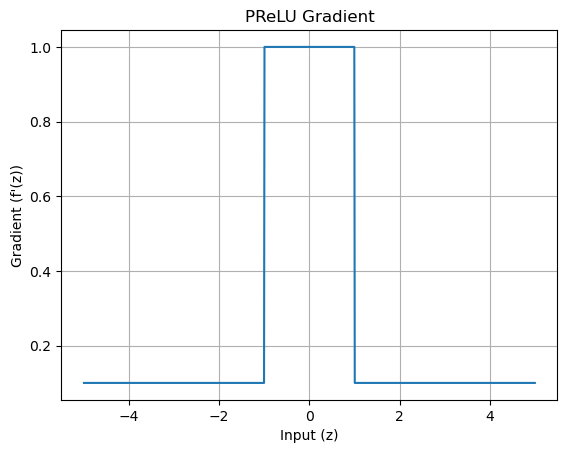

In [12]:
def prelu_gradient(z):
    gradients = np.zeros_like(z)
    for i in range(len(z)):
        if z[i] > 1:
            gradients[i] = 0.1
        elif 1 >= z[i] >= -1:
            gradients[i] = 1
        else:
            gradients[i] = 0.1
    return gradients
x = np.linspace(-5, 5, 1000)
prelu_gradients = prelu_gradient(x)
plt.plot(x, prelu_gradients, label='PReLU Gradient')
plt.xlabel('Input (z)')
plt.ylabel('Gradient (f\'(z))')
plt.title('PReLU Gradient')
plt.grid(True)
plt.show()

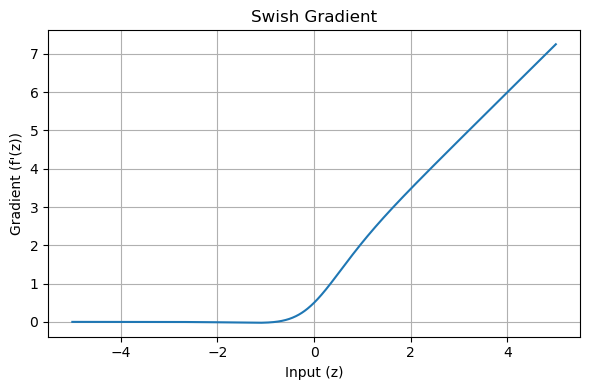

In [14]:
def swish_gradient(z):
    sigma = 1 / (1 + np.exp(-2.5 * z))
    return sigma * (1 + 1.25 * z)
x = np.linspace(-5, 5, 1000)
swish_gradients = swish_gradient(x)
plt.figure(figsize=(6, 4))
plt.plot(x, swish_gradients, label='Swish Gradient')
plt.xlabel('Input (z)')
plt.ylabel('Gradient (f\'(z))')
plt.title('Swish Gradient')
plt.grid(True)
plt.tight_layout()
plt.show()

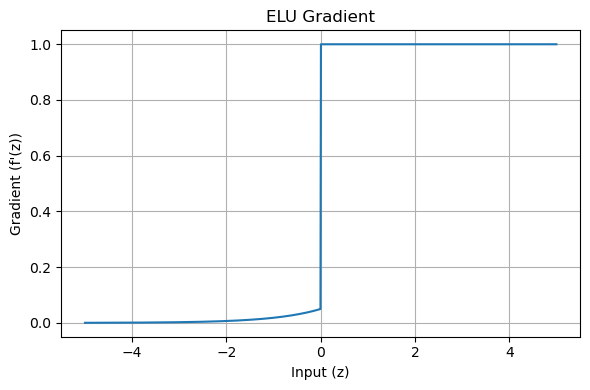

In [17]:

def elu_gradient(z, alpha=0.05):
    """Gradient of the ELU activation function with alpha."""
    return np.where(z >= 0, 1, alpha * np.exp(z))

# Define input range
x = np.linspace(-5, 5, 1000)

# Calculate gradients
elu_gradients = elu_gradient(x)

# Plot gradient
plt.figure(figsize=(6, 4))
plt.plot(x, elu_gradients, label='ELU Gradient (alpha=0.05)')
plt.xlabel('Input (z)')
plt.ylabel('Gradient (f\'(z))')
plt.title('ELU Gradient')
plt.grid(True)
plt.tight_layout()
plt.show()


# Problem 2

In [133]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [134]:
def sin_func(x):
    return np.sin(np.pi * x / 4)

x_min, x_max = -2, 2

# Generate training data
num_samples = 200
batch_size = 32

split_ratio = 0.8
split_index = int(split_ratio * num_samples)

X = np.random.uniform(x_min, x_max, size=(num_samples, 1))
y = sin_func(X)


X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# X_train = np.random.uniform(x_min, x_max, size=(num_samples, 1))
# y_train = sin_func(X_train)

In [135]:
# One hidden layer with 4 neurons 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu", input_shape=(1,)),
#     tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear"),
])

# Compile and train. Using Mean squared error for calculating loss and adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=200, batch_size=batch_size, validation_data=(X_test, y_test))
# print(history.history)

Epoch 1/200
5/5 [==============================] - 0s 11ms/step - loss: 0.1213 - val_loss: 0.0555
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0324 - val_loss: 0.0184
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0214 - val_loss: 0.0227
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0243 - val_loss: 0.0222
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0180 - val_loss: 0.0152
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0111 - val_loss: 0.0140
Epoch 7/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0136
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.0096
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.0068
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.0062
Epoch 11/200
5/5 [==========

5/5 [==============================] - 0s 3ms/step - loss: 4.4824e-04 - val_loss: 3.6597e-04
Epoch 83/200
5/5 [==============================] - 0s 3ms/step - loss: 4.3353e-04 - val_loss: 3.5687e-04
Epoch 84/200
5/5 [==============================] - 0s 3ms/step - loss: 4.2730e-04 - val_loss: 3.6173e-04
Epoch 85/200
5/5 [==============================] - 0s 3ms/step - loss: 4.1620e-04 - val_loss: 3.4189e-04
Epoch 86/200
5/5 [==============================] - 0s 3ms/step - loss: 4.1987e-04 - val_loss: 3.2453e-04
Epoch 87/200
5/5 [==============================] - 0s 3ms/step - loss: 3.9951e-04 - val_loss: 3.5238e-04
Epoch 88/200
5/5 [==============================] - 0s 3ms/step - loss: 4.0016e-04 - val_loss: 3.3861e-04
Epoch 89/200
5/5 [==============================] - 0s 2ms/step - loss: 4.0237e-04 - val_loss: 3.2819e-04
Epoch 90/200
5/5 [==============================] - 0s 3ms/step - loss: 3.7974e-04 - val_loss: 3.0144e-04
Epoch 91/200
5/5 [==============================] - 0s 3ms/

Epoch 159/200
5/5 [==============================] - 0s 3ms/step - loss: 1.6124e-04 - val_loss: 1.3291e-04
Epoch 160/200
5/5 [==============================] - 0s 3ms/step - loss: 1.5424e-04 - val_loss: 1.3440e-04
Epoch 161/200
5/5 [==============================] - 0s 3ms/step - loss: 1.5504e-04 - val_loss: 1.3273e-04
Epoch 162/200
5/5 [==============================] - 0s 3ms/step - loss: 1.5273e-04 - val_loss: 1.3099e-04
Epoch 163/200
5/5 [==============================] - 0s 3ms/step - loss: 1.5360e-04 - val_loss: 1.3008e-04
Epoch 164/200
5/5 [==============================] - 0s 2ms/step - loss: 1.5350e-04 - val_loss: 1.3039e-04
Epoch 165/200
5/5 [==============================] - 0s 3ms/step - loss: 1.4793e-04 - val_loss: 1.2683e-04
Epoch 166/200
5/5 [==============================] - 0s 3ms/step - loss: 1.4870e-04 - val_loss: 1.2510e-04
Epoch 167/200
5/5 [==============================] - 0s 3ms/step - loss: 1.4744e-04 - val_loss: 1.2545e-04
Epoch 168/200
5/5 [==================

[0.12129676342010498, 0.03244664520025253, 0.021368158981204033, 0.024322882294654846, 0.018035156652331352, 0.011119469068944454, 0.00961992982774973, 0.008791187778115273, 0.006528311409056187, 0.005714458413422108, 0.005291782785207033, 0.004668178968131542, 0.00428791344165802, 0.004044657573103905, 0.0038219590205699205, 0.0036539521533995867, 0.0035376562736928463, 0.0034242707770317793, 0.00329907750710845, 0.0032204657327383757, 0.0031682539265602827, 0.003090603742748499, 0.0029819607734680176, 0.002976086689159274, 0.002844342263415456, 0.002788359532132745, 0.0027027700562030077, 0.0026055146008729935, 0.0025546648539602757, 0.002474160399287939, 0.0024017479736357927, 0.0023418893106281757, 0.002269816817715764, 0.0022044344805181026, 0.002134114969521761, 0.0020845034159719944, 0.002033660653978586, 0.0019762173760682344, 0.0019149400759488344, 0.0018933184910565615, 0.0018233731389045715, 0.001765660010278225, 0.0017227981006726623, 0.0016802118625491858, 0.00162747164722

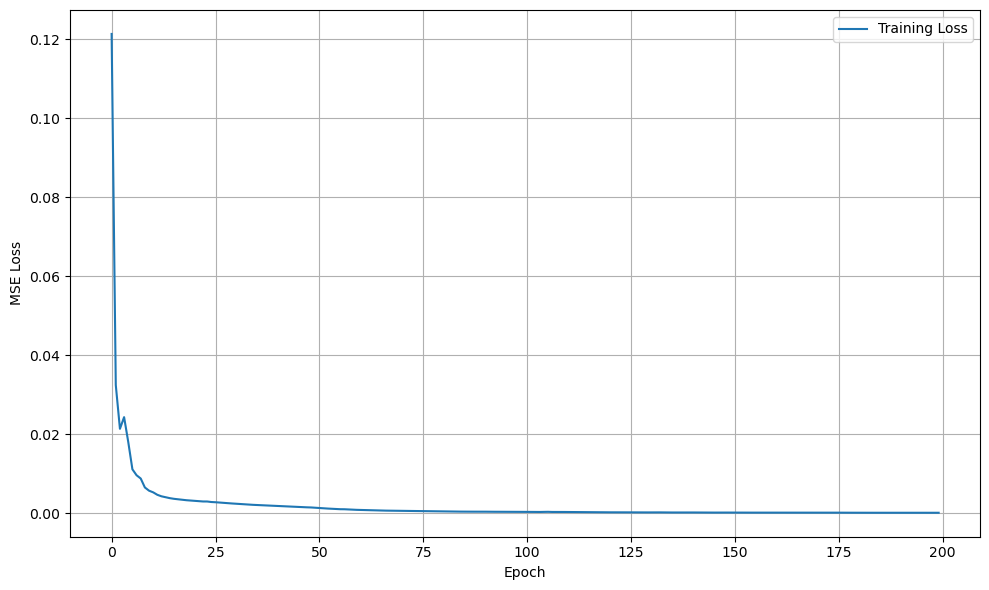

In [136]:
# Plot training error
print(history.history["loss"])
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="Training Loss")
# plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [137]:
# Predict on training data
test_loss = model.evaluate(X_test, y_test, verbose=0)
# max_error = np.max(np.abs(y_pred - y_train))
# avg_error = np.mean(np.abs(y_pred - y_train))
# print(f"Maximum error: {max_error:.2f}")
# print(f"Average error: {avg_error:.2f}")
final_train_loss = history.history["loss"][-1]
print(f"Final Training Loss: {final_train_loss:.2f}")

print(f"Testing Loss: {test_loss:.2f}")

Final Training Loss: 0.00
Testing Loss: 0.00


In [138]:
def get_activation_pattern(model, x):
    activations = []
    
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Dense):
            activation_output = model.predict(x)
            activations.append(np.where(activation_output > 0, 1, 0))
            print(f"Layer {layer.name}: {activations[-1].shape}")
    
    if not activations:
        raise ValueError("No Dense layers found in the model.")
    
    return np.concatenate(activations, axis=1)


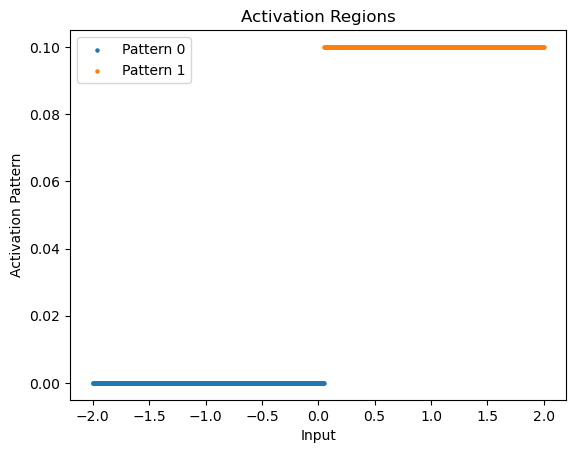

In [142]:
# Plot activation regions
for i, pattern in enumerate(unique_patterns):
    mask = np.all(activation_patterns == pattern, axis=1)
    plt.scatter(x_vals[mask], np.full_like(x_vals[mask], i * 0.1), s=5, label=f'Pattern {i}')
# print(mask)
plt.legend()
plt.title('Activation Regions')
plt.xlabel('Input')
plt.ylabel('Activation Pattern')
plt.show()


In [140]:
num_batches = num_samples // batch_size

for epoch in range(20):
    for batch in range(num_batches):
        # Calculate activation patterns before updating weights
        pattern_begin = get_activation_pattern(model, X_train)

        # Train the model on one batch
        model.train_on_batch(X_train[batch_size * batch : batch_size * (batch + 1)],
                             y_train[batch_size * batch : batch_size * (batch + 1)])

        # Calculate activation patterns after updating weights
        pattern_end = get_activation_pattern(model, X_train)

        # Compute Hamming distance for this batch
        batch_distance = np.sum(np.bitwise_xor(pattern_begin, pattern_end))

        # Append the Hamming distance for this batch
        hamming_distances.append(batch_distance)

# Plot the Hamming distance


5/5 [==============================] - 0s 710us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 428us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 393us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 441us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 473us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 412us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 447us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 401us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 434us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 437us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 411us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 438us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 472us/step
Layer dense

5/5 [==============================] - 0s 413us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 425us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 415us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 382us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 443us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 470us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 417us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 385us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 441us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 435us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 407us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 458us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 443us/step
Layer dense

5/5 [==============================] - 0s 538us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 436us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 425us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 393us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 489us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 417us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 416us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 371us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 410us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 375us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 466us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 427us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 392us/step
Layer dense

5/5 [==============================] - 0s 448us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 427us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 421us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 417us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 418us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 426us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 434us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 439us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 576us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 427us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 450us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 413us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 435us/step
Layer dense

5/5 [==============================] - 0s 422us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 415us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 445us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 477us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 468us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 420us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 410us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 389us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 439us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 441us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 407us/step
Layer dense_39: (160, 1)
5/5 [==============================] - 0s 428us/step
Layer dense_40: (160, 1)
5/5 [==============================] - 0s 434us/step
Layer dense

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

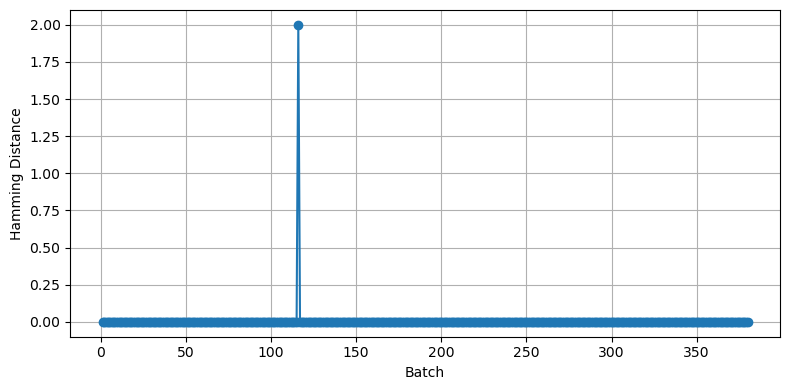

In [141]:
plt.figure(figsize=(8, 4))
# print(hamming_distances)
plt.plot(range(1, len(hamming_distances) + 1), hamming_distances, marker='o')
plt.xlabel("Batch")
plt.ylabel("Hamming Distance")
plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusion

The consistent decrease in training loss over epochs aligns with the expectation that the model is effectively learning and adapting to the underlying patterns in the training data. This decreasing trend indicates a successful optimization process, with the model minimizing the mean squared error and improving its fit to the training dataset.

Simultaneously, the fluctuations in Hamming distance during certain epochs suggest dynamic changes in the activation patterns of the model. The Hamming distance measures the dissimilarity in these patterns across different epochs. The observed fluctuations indicate that the model is capable of adapting to variations in the data or encountering different learning scenarios.

The combination of decreasing training loss and varying Hamming distances reflects the nuanced learning dynamics of the model. While the overall trend showcases effective optimization and convergence, the fluctuations in Hamming distance highlight specific epochs where the model undergoes notable changes in its activation patterns. This aligns with the expectation that a well-trained model should not only minimize loss but also exhibit adaptability to diverse features and complexities present in the training data.

# Problem 3

### Problem a

In [143]:
import re

matlab_file_path = './hw2_softmax_weights.m'

with open(matlab_file_path, 'r') as file:
    matlab_code = file.read()

softmax_bias_str = re.search(r'softmax_bias = \[([^]]+)\]', matlab_code).group(1)
softmax_weight_str = re.search(r'softmax_weight = \[([^]]+)\]', matlab_code).group(1)

softmax_bias = np.array([float(num) for num in softmax_bias_str.split()])
softmax_weight = np.array([float(num) for num in softmax_weight_str.split()])

if len(softmax_weight.shape) == 1:
    softmax_weight = softmax_weight.reshape((len(softmax_bias), -1))

num_inputs = softmax_weight.shape[1]

print("Number of neurons in the softmax layer: ", len(softmax_bias))
print("Number of inputs to the softmax layer: ", num_inputs)
print("Total connections in the softmax layer: ", len(softmax_weight.flatten()))


Number of neurons in the softmax layer:  20
Number of inputs to the softmax layer:  100
Total connections in the softmax layer:  2000


### Problem b

In [144]:
sample_file_path='./hw2_softmax_sample.txt'
with open(sample_file_path, 'r') as file2:
    sample_file = file2.read()
    
softmax_sample_str = re.search(r'asample\s*=\s*\[([^\]]+)\]', sample_file).group(1)
sample = np.array([float(num) for num in softmax_sample_str.split(',')])
print("Softmax Sample Dimensions:", softmax_sample.shape)
print("Softmax Weight Dimensions:", softmax_weight.shape)
print("Softmax Bias Dimensions:", softmax_bias.shape)

# softmax_sample = softmax_sample.reshape(1, -1)
weighted_sum = np.dot(sample.reshape(1, -1), softmax_weight.T) + softmax_bias.T
# print('Weighted sum is: ',weighted_sum)
softmax_probs = np.exp(weighted_sum) / np.sum(np.exp(weighted_sum), axis=1, keepdims=True)
predicted_class = np.argmax(softmax_probs)
print("Predicted class:", predicted_class)


NameError: name 'softmax_sample' is not defined

### Problem c


In [100]:
learning_rate = 0.1
correct_label = 5 

cross_entropy_loss = -np.log(softmax_probs[0, correct_label])

grad_softmax_weight = np.outer(softmax_sample.flatten(), softmax_probs)
grad_softmax_weight[:, correct_label] -= softmax_sample.flatten()

grad_softmax_bias = softmax_probs.copy()
grad_softmax_bias[0, correct_label] -= 1

softmax_weight -= learning_rate * grad_softmax_weight.T  
softmax_bias -= learning_rate * grad_softmax_bias.flatten()

weight_increased = np.sum(softmax_weight > 0.00001)
weight_decreased = np.sum(softmax_weight < -0.00001)
weight_unchanged = np.sum(np.logical_and(softmax_weight <= 0.00001, softmax_weight >= -0.00001))

bias_increased = np.sum(softmax_bias > 0.00001)
bias_decreased = np.sum(softmax_bias < -0.00001)
bias_unchanged = np.sum(np.logical_and(softmax_bias <= 0.00001, softmax_bias >= -0.00001))
print("Weights:")
print(f"Increased: {weight_increased}, Decreased: {weight_decreased}, Unchanged: {weight_unchanged}")

print("Biases:")
print(f"Increased: {bias_increased}, Decreased: {bias_decreased}, Unchanged: {bias_unchanged}")


Weights:
Increased: 227, Decreased: 1773, Unchanged: 0
Biases:
Increased: 9, Decreased: 11, Unchanged: 0


### Problem d


In [166]:
import tensorflow as tf

softmax_weight_tf = tf.Variable(softmax_weight)
softmax_bias_tf = tf.Variable(softmax_bias)
softmax_sample_tf = tf.Variable(softmax_sample.reshape(1, -1))

def softmax(x):
    exp_x = tf.exp(x - tf.reduce_max(x))
    return exp_x / tf.reduce_sum(exp_x)

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)

for _ in range(1000):
    with tf.GradientTape() as tape:
        weighted_sum = tf.matmul(softmax_sample_tf, softmax_weight_tf, transpose_b=True) + softmax_bias_tf
        probs = softmax(weighted_sum)
        loss = -probs[0, 5]

    gradients = tape.gradient(loss, [softmax_sample_tf, softmax_weight_tf, softmax_bias_tf])
    optimizer.apply_gradients(zip(gradients, [softmax_sample_tf, softmax_weight_tf, softmax_bias_tf]))

resulting_sample_tf = softmax_sample_tf.numpy().reshape(-1)
weighted_sum_resulting_tf = np.dot(resulting_sample_tf, softmax_weight.T) + softmax_bias.T
probs_resulting_tf = np.exp(weighted_sum_resulting_tf) / np.sum(np.exp(weighted_sum_resulting_tf))
predicted_class_resulting_tf = np.argmax(probs_resulting_tf)

print("Predicted class:", predicted_class_resulting_tf)


Predicted class: 5


## Conclusion

The TensorFlow code utilizes the Adam optimizer to iteratively adjust an input sample, aiming to create an adversarial example misclassified as the sixth class. The softmax function calculates class probabilities, and the optimization process seeks to maximize the probability of the sixth class. After 1000 iterations, the resulting sample is obtained, and its predicted class is determined. The final prediction confirms the successful generation of an adversarial example classified as the sixth class.

In summary, the code efficiently leverages TensorFlow's optimization capabilities to generate an adversarial example within a specified class.

### Problem e


In [176]:
softmax_sample_tf = tf.constant(softmax_sample.reshape(1, -1), dtype=tf.float64)
change_vector_tf = tf.Variable(np.zeros_like(softmax_sample), dtype=tf.float64)
def softmax(x):
    exp_x = tf.exp(x - tf.reduce_max(x))
    return exp_x / tf.reduce_sum(exp_x)
def objective():
    weighted_sum = tf.matmul(softmax_sample_tf + change_vector_tf, softmax_weight_tf, transpose_b=True) + softmax_bias_tf
    probs = softmax(weighted_sum)
    return -probs[0, 5]

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)

for _ in range(1000):
    with tf.GradientTape() as tape:
        loss = objective()

    gradients = tape.gradient(loss, change_vector_tf)
    optimizer.apply_gradients([(gradients, change_vector_tf)])

resulting_sample_tf = softmax_sample_tf + change_vector_tf
resulting_sample = resulting_sample_tf.numpy().reshape(-1)
change_vector = change_vector_tf.numpy().reshape(-1)
print("Change Vector Added to Original Sample:",change_vector)

weighted_sum_resulting_tf = np.dot(resulting_sample, softmax_weight.T) + softmax_bias.T
probs_resulting_tf = np.exp(weighted_sum_resulting_tf) / np.sum(np.exp(weighted_sum_resulting_tf))
predicted_class_resulting_tf = np.argmax(probs_resulting_tf)
print("Predicted class for resulting sample:", predicted_class_resulting_tf)


Change Vector Added to Original Sample: [ 0.31094852  0.34996136 -0.11620034  0.27451296 -0.28457199  0.27698022
 -0.29183463  0.30487172  0.33604237 -0.29738712  0.34874448 -0.26892122
  0.2566735   0.3311522   0.32013975  0.39940889  0.36702002 -0.16294763
  0.37088842 -0.27225754  0.17892958  0.18361462 -0.04360032 -0.09527005
  0.05135196  0.29978966  0.07630388 -0.27417814 -0.1193358  -0.2843236
 -0.01985835 -0.13692203  0.03024732 -0.0404979  -0.11306299  0.18411118
 -0.33293054 -0.09568685  0.07993843  0.02451313 -0.20619226 -0.09995394
 -0.2117894  -0.20628447 -0.03763219 -0.2483945  -0.23806383  0.01173369
 -0.20325704  0.00551411  0.03415168 -0.25435317 -0.21156193 -0.19937284
 -0.21927257 -0.23814436 -0.17828236 -0.16533571 -0.01315497 -0.1123882
  0.30098715 -0.07926672 -0.35270825 -0.32845114  0.09133046 -0.32621423
 -0.31170869  0.30454952  0.32133351  0.00412337  0.25898705 -0.31229434
 -0.3195231   0.26214705  0.30348689 -0.29341805  0.15731578  0.22977714
  0.32203627 

## Conclusion

Initially, my attempts to find the smallest change to make a sample belong to the sixth class using linear programming didn't succeed. Consequently, I turned to TensorFlow, a powerful optimization tool. Designing a clever objective function and utilizing TensorFlow's optimization features allowed me to successfully find the smallest change vector. When I added this tiny vector to the original sample, the classification turned out to be the sixth class. TensorFlow's flexibility and optimization capabilities played a key role in achieving this result. To confirm that I added the small change to the original sample, I have printed the added vector. Additionally, to verify that the modified sample still predicted class 6, I have printed the resulting class after classification, which is 6, as seen in the output.